Data: https://www.phila.gov/property/data/

Reference: https://medium.com/@GaussEuler/philadelphia-housing-data-part-i-data-analysis-fe45415554a9

In [ ]:
!Powershell.exe -Command "Invoke-WebRequest -Uri 'https://phl.carto.com/api/v2/sql?q=SELECT+*,+ST_Y(the_geom)+AS+lat,+ST_X(the_geom)+AS+lng+FROM+opa_properties_public&filename=opa_properties_public&format=csv&skipfields=cartodb_id' -OutFile 'data.csv'"


Set up pandas with CSV file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

C:\Users\Paul\AppData\Local\Temp\ipykernel_20124\1507164070.py:1: DtypeWarning: Columns (5,26,54,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


# Preprocessing

In [13]:
df.head()

,the_geom,the_geom_webmercator,assessment_date,basements,beginning_point,book_and_page,building_code,building_code_description,category_code,category_code_description,...,year_built,year_built_estimate,zip_code,zoning,pin,building_code_new,building_code_description_new,objectid,lat,lng
0,0101000020E6100000B31249F865C952C0BA78F58354FF...,0101000020110F0000D102FB3B3FE95FC10F1F8874278F...,2022-05-24,NaN,"124'9 1/2"" E GERMANTN",NaN,SC,VACANT LAND COMMER < ACRE,6,VACANT LAND,...,NaN,NaN,19133.0,CMX2,1001489682,NaN,NaN,435475263,39.994767,-75.146849
1,0101000020E61000001E9A8C57D0CB52C0FE38F5B4E2FD...,0101000020110F000049FE009A59ED5FC1F6EC21858D8D...,2022-05-24,NaN,175' N CLIFFORD ST,NaN,SR,VACANT LAND RESIDE < ACRE,6,VACANT LAND,...,NaN,NaN,19121.0,RSA5,1001648434,NaN,NaN,435475264,39.983481,-75.184591
2,0101000020E6100000A4470EB29FCB52C079D38815B0FD...,0101000020110F000047F97DF806ED5FC1C816E168558D...,2022-05-24,NaN,"30'8"" N COLUMBIA AVE",NaN,SR,VACANT LAND RESIDE < ACRE,6,VACANT LAND,...,NaN,NaN,19121.0,RSA5,1001646785,NaN,NaN,435475265,39.981936,-75.181622
3,0101000020E61000003AF1090FA2CA52C0BD6C89C90BFE...,0101000020110F00006E3AA02458EB5FC16067F80DBB8D...,2022-05-24,NaN,88' N NORRIS ST,NaN,SR,VACANT LAND RESIDE < ACRE,6,VACANT LAND,...,NaN,NaN,19121.0,RSA5,1001633410,NaN,NaN,435475266,39.984735,-75.166141
4,0101000020E61000000D307E44B1CA52C04EFF883A21FE...,0101000020110F000072A80CFA71EB5FC1DD9832D2D28D...,2022-05-24,NaN,280' N OF NORRIS ST,NaN,SR,VACANT LAND RESIDE < ACRE,6,VACANT LAND,...,NaN,NaN,19121.0,RSA5,1001578463,NaN,NaN,435475267,39.985389,-75.167070


Initial Drops after combing through the data.

Getting all columns with missing values > 20%.
Checking each in CSV file to decide what can be dropped.

In [3]:
missing_percent = df.isnull().mean() * 100
columns_missing = missing_percent[missing_percent > 20].index.tolist()
columns_missing

['basements',
 'central_air',
 'cross_reference',
 'date_exterior_condition',
 'fuel',
 'garage_type',
 'house_extension',
 'mailing_address_1',
 'mailing_address_2',
 'mailing_care_of',
 'market_value_date',
 'number_of_rooms',
 'other_building',
 'owner_2',
 'separate_utilities',
 'sewer',
 'site_type',
 'street_direction',
 'suffix',
 'type_heater',
 'unfinished',
 'unit',
 'utility',
 'year_built_estimate']

In [3]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Drop duplicate rows across all columns
    df = df.drop_duplicates()
    # Filter rows based on column: 'category_code'
    df = df[df['category_code'] < 4]
    # Drop column: 'the_geom'
    df = df.drop(columns=['the_geom'])
    # Drop column: 'the_geom_webmercator'
    df = df.drop(columns=['the_geom_webmercator'])
    # Drop column: 'book_and_page'
    df = df.drop(columns=['book_and_page'])
    # Drop column: 'cross_reference'
    df = df.drop(columns=['cross_reference'])
    # Drop column: 'date_exterior_condition'
    df = df.drop(columns=['date_exterior_condition'])
    # Drop column: 'location'
    df = df.drop(columns=['location'])
    # Drop column: 'mailing_address_2'
    df = df.drop(columns=['mailing_address_2'])
    # Drop column: 'mailing_city_state'
    df = df.drop(columns=['mailing_city_state'])
    # Drop columns: 'mailing_street', 'mailing_zip'
    df = df.drop(columns=['mailing_street', 'mailing_zip'])
    # Drop column: 'market_value_date'
    df = df.drop(columns=['market_value_date'])
    # Drop column: 'beginning_point'
    df = df.drop(columns=['beginning_point'])
    # Drop column: 'basements'
    df = df.drop(columns=['basements'])
    # Drop column: 'building_code_description'
    df = df.drop(columns=['building_code_description'])
    # Drop column: 'site_type'
    df = df.drop(columns=['site_type'])
    # Drop column: 'separate_utilities'
    df = df.drop(columns=['separate_utilities'])
    # Drop column: 'unfinished'
    df = df.drop(columns=['unfinished'])
    # Drop column: 'utility'
    df = df.drop(columns=['utility'])
    # Drop column: 'year_built_estimate'
    df = df.drop(columns=['year_built_estimate'])
    # Drop column: 'unit'
    df = df.drop(columns=['unit'])
    # Drop columns: 'owner_1', 'owner_2'
    df = df.drop(columns=['owner_1', 'owner_2'])
    # Drop column: 'category_code_description'
    df = df.drop(columns=['category_code_description'])
    # Drop column: 'fuel'
    df = df.drop(columns=['fuel'])
    # Drop column: 'house_number'
    df = df.drop(columns=['house_number'])
    # Drop column: 'mailing_address_1'
    df = df.drop(columns=['mailing_address_1'])
    # Drop column: 'mailing_care_of'
    df = df.drop(columns=['mailing_care_of'])
    # Drop column: 'other_building'
    df = df.drop(columns=['other_building'])
    # Drop column: 'registry_number'
    df = df.drop(columns=['registry_number'])
    # Drop column: 'sewer'
    df = df.drop(columns=['sewer'])
    # Drop column: 'street_code'
    df = df.drop(columns=['street_code'])
    # Drop column: 'street_direction'
    df = df.drop(columns=['street_direction'])
    # Drop column: 'street_name'
    df = df.drop(columns=['street_name'])
    # Drop column: 'suffix'
    df = df.drop(columns=['suffix'])
    # Drop column: 'type_heater'
    df = df.drop(columns=['type_heater'])
    # Drop column: 'objectid'
    df = df.drop(columns=['objectid'])
    # Drop columns: 'building_code_description_new', 'building_code_new'
    df = df.drop(columns=['building_code_description_new', 'building_code_new'])
    # Drop column: 'house_extension'
    df = df.drop(columns=['house_extension'])
    # Drop column: 'building_code'
    df = df.drop(columns=['building_code'])
    # Drop column: 'recording_date'
    df = df.drop(columns=['recording_date'])
    # Drop column: 'sale_date'
    df = df.drop(columns=['sale_date'])
    # Drop column: 'assessment_date'
    df = df.drop(columns=['assessment_date'])
    # Drop column: 'central_air'
    df = df.drop(columns=['central_air'])
    # Drop column: 'parcel_number'
    df = df.drop(columns=['parcel_number'])
    # Drop column: 'state_code'
    df = df.drop(columns=['state_code'])
    # Drop column: 'number_of_rooms'
    df = df.drop(columns=['number_of_rooms'])
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,category_code,census_tract,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,garage_spaces,garage_type,...,topography,total_area,total_livable_area,view_type,year_built,zip_code,zoning,pin,lat,lng
26,3,24.0,51.0,0.0,0.0,NaN,NaN,32.0,NaN,NaN,...,F,1840.0,1840.0,I,1900.0,19147.0,CMX2,1001608624,39.937917,-75.158254
27,1,160.0,64.0,0.0,0.0,4.0,0.0,14.0,0.0,NaN,...,F,776.0,258.0,I,1899.0,19125.0,RSA5,1001129558,39.977132,-75.127125
34,3,373.0,79.0,80000.0,0.0,NaN,NaN,20.0,NaN,NaN,...,F,1829.0,2247.0,I,1950.0,19145.0,CMX1,1001408261,39.912470,-75.175407
39,3,40.0,80.0,43279.6,0.0,NaN,NaN,16.0,NaN,NaN,...,F,1280.0,2168.0,I,1920.0,19148.0,CMX2,1001106361,39.918985,-75.170514
62,3,198.0,51.0,0.0,0.0,NaN,NaN,16.0,NaN,NaN,...,F,820.0,1368.0,I,1920.0,19140.0,CMX2,1001607760,40.011361,-75.142306


These are all of the columns in the dataset after the first drops. Many of these can be removed from the start since they will have no use for a regression model. For instance, mailing addresses will not be useful since we know houses on one end of a street can be worth a lot more compared to a house on the other end of the street, so this data wll not be helpful in a regression model. Many columns have >40% missing values as well.

Filling Missing Values

Text(0.5, 0, 'Number of Missing values')

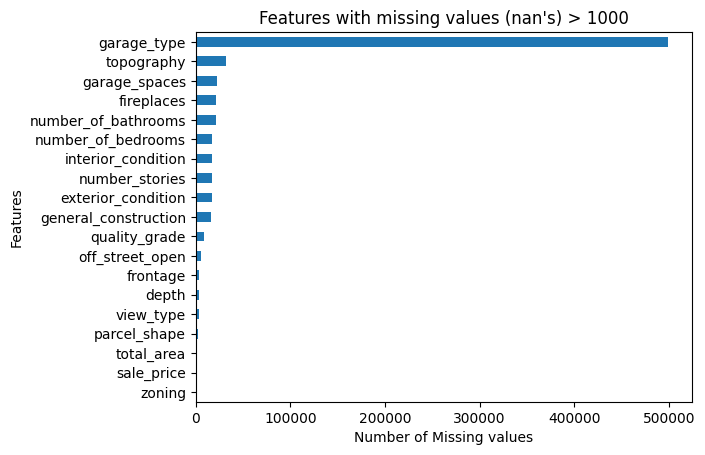

In [5]:
missing = df_clean.isnull().sum()
missing = missing[missing >= 1000]
missing.sort_values(inplace=True)
missing.plot.barh()
plt.title("Features with missing values (nan's) > 1000")
plt.ylabel("Features")
plt.xlabel("Number of Missing values")

In [4]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_clean):
    # Replace missing values with 0 in column: 'garage_type'
    df_clean = df_clean.fillna({'garage_type': 0})
    # Replace missing values with "Unknown" in column: 'general_construction'
    df_clean = df_clean.fillna({'general_construction': "Unknown"})
    # Replace missing values with 0 in column: 'garage_spaces'
    df_clean = df_clean.fillna({'garage_spaces': 0})

    # Replace using median for numerical data
    # Replace missing values with the median of each column in: 'frontage'
    df_clean = df_clean.fillna({'frontage': df_clean['frontage'].median()})
    # Replace missing values with the median of each column in: 'off_street_open'
    df_clean = df_clean.fillna({'off_street_open': df_clean['off_street_open'].median()})
    # Replace missing values with the median of each column in: 'taxable_building'
    df_clean = df_clean.fillna({'taxable_building': df_clean['taxable_building'].median()})
    # Replace missing values with the median of each column in: 'number_of_bathrooms'
    df_clean = df_clean.fillna({'number_of_bathrooms': df_clean['number_of_bathrooms'].median()})
    # Replace missing values with the median of each column in: 'number_of_bedrooms'
    df_clean = df_clean.fillna({'number_of_bedrooms': df_clean['number_of_bedrooms'].median()})
    # Replace missing values with the median of each column in: 'interior_condition'
    df_clean = df_clean.fillna({'interior_condition': df_clean['interior_condition'].median()})
    # Replace missing values with the median of each column in: 'number_stories'
    df_clean = df_clean.fillna({'number_stories': df_clean['number_stories'].median()})
    # Replace missing values with the median of each column in: 'total_livable_area'
    df_clean = df_clean.fillna({'total_livable_area': df_clean['total_livable_area'].median()})
    # Replace missing values with the median of each column in: 'total_area'
    df_clean = df_clean.fillna({'total_area': df_clean['total_area'].median()})
    # Replace missing values with the median of each column in: 'depth'
    df_clean = df_clean.fillna({'depth': df_clean['depth'].median()})

    #Replace using Mode for categorical
    # Replace missing values with the mode of each column in: 'geographic_ward'
    df_clean = df_clean.fillna({'geographic_ward': df_clean['geographic_ward'].mode()[0]})
    # Replace missing values with the most common value of each column in: 'parcel_shape'
    df_clean = df_clean.fillna({'parcel_shape': df_clean['parcel_shape'].mode()[0]})
    # Replace missing values with the most common value of each column in: 'quality_grade'
    df_clean = df_clean.fillna({'quality_grade': df_clean['quality_grade'].mode()[0]})
    # Replace missing values with the mode of each column in: 'year_built'
    df_clean = df_clean.fillna({'year_built': df_clean['year_built'].mode()[0]})
    # Replace missing values with the mode of each column in: 'exterior_condition'
    df_clean = df_clean.fillna({'exterior_condition': df_clean['exterior_condition'].mode()[0]})

    #Replace with most common when already a categorical
    # Replace missing values with the most common value of each column in: 'zoning'
    df_clean = df_clean.fillna({'zoning': df_clean['zoning'].mode()[0]})
    # Replace missing values with the most common value of each column in: 'view_type'
    df_clean = df_clean.fillna({'view_type': df_clean['view_type'].mode()[0]})
    # Replace missing values with the most common value of each column in: 'topography'
    df_clean = df_clean.fillna({'topography': df_clean['topography'].mode()[0]})

    #Misc replacements of missing values
    # Replace missing values with 0 in column: 'fireplaces'
    df_clean = df_clean.fillna({'fireplaces': 0})
    # Drop rows with missing data in column: 'census_tract'
    df_clean = df_clean.dropna(subset=['census_tract'])
    # Drop rows with missing data in column: 'market_value'
    df_clean = df_clean.dropna(subset=['market_value'])
    return df_clean


df_clean_2 = clean_data(df_clean.copy())
df_clean_2.head()

,category_code,census_tract,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,garage_spaces,garage_type,...,topography,total_area,total_livable_area,view_type,year_built,zip_code,zoning,pin,lat,lng
26,3,24.0,51.0,0.0,0.0,4.0,0.0,32.0,0.0,0.0,...,F,1840.0,1840.0,I,1900.0,19147.0,CMX2,1001608624,39.937917,-75.158254
27,1,160.0,64.0,0.0,0.0,4.0,0.0,14.0,0.0,0.0,...,F,776.0,258.0,I,1899.0,19125.0,RSA5,1001129558,39.977132,-75.127125
34,3,373.0,79.0,80000.0,0.0,4.0,0.0,20.0,0.0,0.0,...,F,1829.0,2247.0,I,1950.0,19145.0,CMX1,1001408261,39.912470,-75.175407
39,3,40.0,80.0,43279.6,0.0,4.0,0.0,16.0,0.0,0.0,...,F,1280.0,2168.0,I,1920.0,19148.0,CMX2,1001106361,39.918985,-75.170514
62,3,198.0,51.0,0.0,0.0,4.0,0.0,16.0,0.0,0.0,...,F,820.0,1368.0,I,1920.0,19140.0,CMX2,1001607760,40.011361,-75.142306


In [5]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_clean_2):
    # Filter rows based on column: 'census_tract'
    df_clean_2 = df_clean_2[~(df_clean_2['census_tract'] > 400)]
    # Filter rows based on column: 'depth'
    df_clean_2 = df_clean_2[~(df_clean_2['depth'] > 300)]
    # Filter rows based on column: 'fireplaces'
    df_clean_2 = df_clean_2[~(df_clean_2['fireplaces'] > 5)]
    # Filter rows based on column: 'frontage'
    df_clean_2 = df_clean_2[~(df_clean_2['frontage'] > 200)]
    # Filter rows based on column: 'garage_spaces'
    df_clean_2 = df_clean_2[~(df_clean_2['garage_spaces'] > 4)]
    # Drop column: 'pin'
    df_clean_2 = df_clean_2.drop(columns=['pin'])
    return df_clean_2

df_clean_3 = clean_data(df_clean_2.copy())
df_clean_3.head()

,category_code,census_tract,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,garage_spaces,garage_type,...,taxable_land,topography,total_area,total_livable_area,view_type,year_built,zip_code,zoning,lat,lng
26,3,24.0,51.0,0.0,0.0,4.0,0.0,32.0,0.0,0.0,...,58420.0,F,1840.0,1840.0,I,1900.0,19147.0,CMX2,39.937917,-75.158254
27,1,160.0,64.0,0.0,0.0,4.0,0.0,14.0,0.0,0.0,...,2600.0,F,776.0,258.0,I,1899.0,19125.0,RSA5,39.977132,-75.127125
34,3,373.0,79.0,80000.0,0.0,4.0,0.0,20.0,0.0,0.0,...,30910.0,F,1829.0,2247.0,I,1950.0,19145.0,CMX1,39.912470,-75.175407
39,3,40.0,80.0,43279.6,0.0,4.0,0.0,16.0,0.0,0.0,...,72800.0,F,1280.0,2168.0,I,1920.0,19148.0,CMX2,39.918985,-75.170514
62,3,198.0,51.0,0.0,0.0,4.0,0.0,16.0,0.0,0.0,...,16100.0,F,820.0,1368.0,I,1920.0,19140.0,CMX2,40.011361,-75.142306


In [18]:
df_clean_2.dtypes

category_code             int64
census_tract            float64
depth                   float64
exempt_building         float64
exempt_land             float64
exterior_condition      float64
fireplaces              float64
frontage                float64
garage_spaces           float64
garage_type             float64
general_construction     object
geographic_ward         float64
homestead_exemption       int64
interior_condition      float64
market_value            float64
number_of_bathrooms     float64
number_of_bedrooms      float64
number_stories          float64
off_street_open         float64
parcel_shape             object
quality_grade            object
sale_price              float64
street_designation       object
taxable_building        float64
taxable_land            float64
topography               object
total_area              float64
total_livable_area      float64
view_type                object
year_built              float64
zip_code                float64
zoning  

In [ ]:
CATEGORICAL_COLUMNS = """
category_code
exempt_building
exempt_land
exterior_condition
frontage
garage_type
general_construction
geographic_ward
homestead_exemption
interior_condition
off_street_open
parcel_shape
quality_grade
street_designation
topography
view_type
year_built
zip_code
zoning
pin
lat
lng
"""
NUMERICAL_COLUMNS = """
total_livable_area
total_area
taxable_building
taxable_land
sale_price
market_value
number_of_bathrooms
number_of_bedrooms
number_stories
garage_spaces
fireplaces
census_tract
depth
"""

## In Progress

### Check columns again

In [6]:
print("\nThe most important features relative to the target - 'market_value':")
corr = df_clean_3.corr()
corr.sort_values(["market_value"],ascending = False, inplace = True)
print(corr.market_value)


The most important features relative to the target - 'market_value':


ValueError: could not convert string to float: 'A '

Removing all Values in market value and sale price that are Missing

In [ ]:
data = data.dropna(subset=['market_value'])
data = data.dropna(subset=['sale_price'])

Check to see if there are still any null values

In [ ]:
data.market_value.isnull().any()

In [ ]:
data.sale_price.isnull().any()

Deleting values that are 0 for market value and sale price, since they don't make sense to have

In [ ]:
data = data.drop(data[data.market_value == 0].index)

In [ ]:
data = data.drop(data[data.sale_price == 0].index)

Fixing Longitude and Latitude

In [ ]:
data["lng"] = data.lng.fillna(data.lng.mean())

In [ ]:
data.lng.value_counts(dropna=False).head(5)

Longitude values are negative, so getting absolute value so they are positive

In [ ]:
data.loc[:, "lng"] = data['lng'].abs()

In [ ]:
data.lat.value_counts(dropna=False).head()

Latitude is fine so no need to fix

Check Zip Codes

In [ ]:
data.zip_code.value_counts(dropna=False).head()

Check Basements

In [ ]:
data.basements.value_counts(dropna=False)
# [NOTE: REPLACING 'NaN' WITH 'L' (my definition)]
# D = Full – Unknown Finish
# F = Partial - Semi-Finished
# H = Partial - Unknown Finish
# C = Full - Unfinished
# A = Full - Finished
# J = Unknown Size - Unfinished
# 0 = No Basement [NOTE: REPLACING '0' WITH 'K']
# E = Partial - Finished
# I = Unknown Size - Finished
# G = Partial - Unfinished
# B = Full - Semi-Finished

Replacing Codes

In [ ]:
data.loc[:, "basements"] = data.loc[:, "basements"].fillna('L')
data.loc[:, "basements"] = data['basements'].replace('0', 'K')

Checking Central Air

In [ ]:
data.central_air.value_counts(dropna=False)

In [ ]:
# Replacing '0' with 'N' (i.e. NO central_air)
data.loc[:, "central_air"] = data['central_air'].replace('0', 'N')
# Replacing the "NaNs" with 'N'
data.loc[:, "central_air"] = data['central_air'].fillna('N')
# Replacing '1' with 'Y' (i.e. YES central_air)
data.loc[:, "central_air"] = data['central_air'].replace('1', 'Y')

Checking Exterior Condition

In [ ]:
data.exterior_condition.value_counts(dropna=False)
# Lower values are better quality
# 0 is Missing/NA

In [ ]:
data.loc[:, "exterior_condition"] = data['exterior_condition'].fillna(0.0)

In [ ]:
data.exterior_condition.value_counts(dropna=False)

Checking Garage Type - Removing because unclear how to organize

In [ ]:
data.garage_type.value_counts(dropna=False)

In [ ]:
data = data.drop('garage_type', axis = 1)

Checking Correlation of Features to the target

In [ ]:
print("\nThe most important features relative to the target - 'market_value':")
corr = data.corr()
corr.sort_values(["market_value"],ascending = False, inplace = True)
print(corr.market_value)